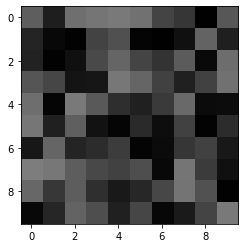

In [3]:
from matplotlib import pyplot as plt

# We're gonna use numpy

import numpy as np

# math!
import math

# randomly initialise an image 10 * 10 pixels
my_array = np.random.random((10,10))

# Also use 'full' or 'ones' or 'zeros'
# y = np.zeros((10,10)) # also try 'full((10,10),0.5)' or 'ones'

# cmap sets the colourmap - https://matplotlib.org/examples/color/colormaps_reference.html
# cmap is ignored for datasets with rank of 3 or 4, as these are assumed to be RGB(a)
# interpolation is used when the number of pixels in the array
# is such that it can't be shown properly given the size of the plot
# you need to set the lower and upper limits with clim !!!

plt.imshow(my_array,  cmap='gray', clim=(0,2))
plt.show()


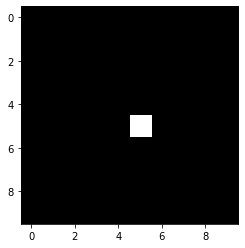

In [4]:
myImage = np.zeros((10,10))

myImage[5,5]=1

plt.imshow(myImage, clim=(0,1),cmap="gray")
plt.show()

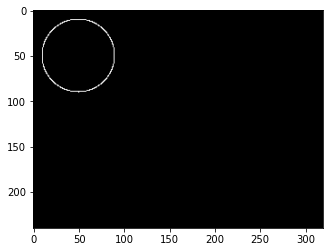

In [5]:
# This doesn't look great, but it is useful to do

# so numpy arrays are column major, not row major.
# So you need to do height first
myImage = np.zeros((240,320))

# This code is exactly the same as the the code frmo
TWO_PI = 3.14159 * 2
segments = 600
spacing = TWO_PI / segments
size = 40

for i in range(segments):
    x = math.cos(spacing * i) * size
    y = math.sin(spacing * i) * size
    myImage[math.floor(x) + 50, math.floor(y) + 50] = 1 # notice we need to floor the output to ints

plt.imshow(myImage, interpolation="bilinear", clim=(0,1),cmap="gray")
plt.show()

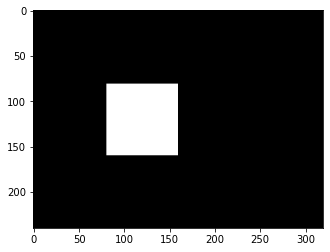

In [6]:
myImage = np.zeros((240,320))

# This code is exactly the same as the the code from our JS and C++ examples
TWO_PI = 3.14159 * 2
segments = 600
spacing = TWO_PI * 2 / segments
size = 40
centre = 120

for i in range(240):
    for j in range(320):
        if abs(centre-i) < size and abs(centre-j) < size:
            myImage[i,j]=1

plt.imshow(myImage, clim=(0,1),cmap="gray")
plt.show()

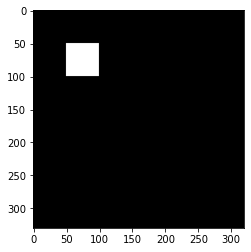

In [7]:
image = np. zeros((330, 320))

height=50

width=50

posx =50

posy=50

for row in range(height):
    image [row + posy, posx:width+posx]=1

plt. imshow(image, clim=(0,1), cmap="gray")
plt. show()

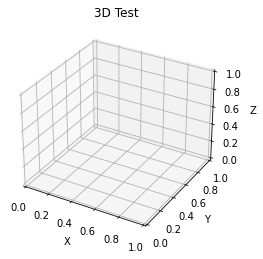

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def gen_rand_line(length, dims=2):
    """
    Create a line using a random walk algorithm.

    Parameters
    ----------
    length : int
        The number of points of the line.
    dims : int
        The number of dimensions of the line.
    """
    line_data = np.empty((dims, length))
    line_data[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = (np.random.rand(dims) - 0.5) * 0.1
        line_data[:, index] = line_data[:, index - 1] + step
    return line_data


def update_lines(num, data_lines, lines):
    for line, data in zip(lines, data_lines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Fifty lines of random 3-D lines
data = [gen_rand_line(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, 50, fargs=(data, lines), interval=50)

plt.show()

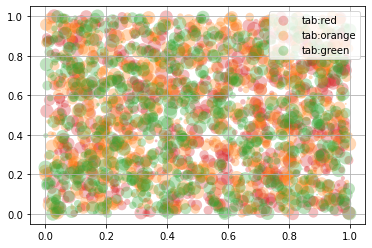

In [8]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['tab:red', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()